In [1]:
#required to read and data cleaning tasks on csv file
import pandas as pd 

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Delete unnecessary columns 'Customer Id' and String object'Gender'
df1 = df.drop(df.columns[[0,1]], axis =1)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [4]:
#check if there is any empty value in a raw
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

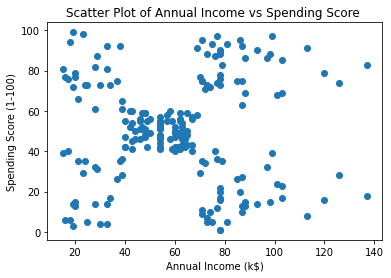

In [5]:
from matplotlib import pyplot as plt

# Extract two columns of interest from the dataframe to visualize
x = df1.iloc[:, 1].tolist()
y = df1.iloc[:, 2].tolist()

# Create the plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score ')

# Show the plot
plt.show()

In [6]:
#convert dataframe values as numpy array object
df2 = df1.values

In [7]:
import numpy as np
import random

# The clarans_algo function takes in a data set "data", the number of clusters "cluster_count", the number of neighbors to explore "max_neighbors" and the number of local minima to explore "num_locals".
def clarans_algo(data, cluster_count, max_neighbors, num_locals):

    # Initialize variables to keep track of the best clustering solution
    best_medoids, best_assignments, best_distances, best_cost = None, None, None, None

    for i in range(num_locals):
        # Randomly select initial medoids from the data
        current_medoids = np.random.permutation(np.arange(data.shape[0]))[0:cluster_count]
        
        # Assign the data to the initial medoids
        distances, cost, assignments = assignment(data, current_medoids, None, cluster_count)
        
        j = 0
        while j < max_neighbors:
            # Randomly select a new medoid from the data
            new_med = current_medoids.copy()
            new_med[random.randint(0, cluster_count-1)] = random.choice(list(set(range(data.shape[0]))-set(current_medoids)))
            
            # Assign the data to the new medoids
            new_dist, new_cost, new_assign = assignment(data, new_med, distances, cluster_count)
            j += 1
            
            # Check if the new clustering solution is better
            if new_cost < cost:
                current_medoids, assignments, distances, cost = new_med, new_assign, new_dist, new_cost
                j = 0
                
        # Check if the current clustering solution is the best so far
        if best_cost is None or cost < best_cost:
            best_medoids, best_assignments, best_distances, best_cost = current_medoids.copy(), assignments, distances, cost

    return best_medoids, best_assignments, best_distances, best_cost

def assignment(data, medoids, prev_dist, cluster_count):

#     Assign the data to the closest medoids.

    if prev_dist is None:
        dist = np.zeros((data.shape[0], cluster_count))
    else:
        dist = prev_dist.copy()
    
    for i in range(cluster_count):
        dist[:, i] = np.sum((data - data[medoids[i],:])**2, axis=1)
    
    cost = np.amin(dist, axis=1).sum()
    assignments = np.argmin(dist, axis=1) 
    return dist, cost, assignments

In [8]:
#apply algorithm on dataset
best_medoids, best_assignments, best_distances, best_cost = clarans_algo(data=df2, cluster_count=5, max_neighbors=10, num_locals=100)

In [9]:
# indexes of best medoids 
best_medoids

array([175, 170,  17,  66,  36])

In [10]:
# value of best medoids
best_medoids_values = [df1.iloc[i, :].tolist() for i in best_medoids]
best_medoids_values

[[30, 88, 86], [40, 87, 13], [20, 21, 66], [43, 48, 50], [42, 34, 17]]

In [11]:
# indexes of different clusters formed by algorithm
best_assignments

array([2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 3, 3,
       4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [12]:
# best minimum cost
best_cost

87083.0

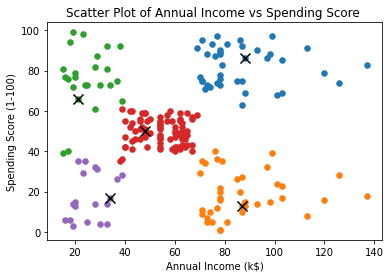

In [13]:
# Plot the data points with different colors for each cluster
for i in range(5):
    cluster = df2[best_assignments == i]
    plt.scatter(cluster[:, 1], cluster[:, 2], s=30, label=f'Cluster {i}')

# Plot the medoids as black X symbols
for i in range(5):
    plt.scatter(df2[best_medoids[i], 1], df2[best_medoids[i], 2], marker='x', s=100, color='black')

# Add labels and a title to the plot
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score ')

# Display the plot
plt.show()

In [ ]:
#Dataset Link:  https://www.kaggle.com/code/glushko/mall-customer-segmentation/data